# Assignment 1

## C. Unsupervised Learning (8Points)
### C.I. k-means Clustering (4.5 points)

1) (0.5 points) Study k-means and briefly describe how this model is trained. (Aim for 3 sentences.)

k-means is an iterative clustering algorithm, it assigns data points into k clusters by minimizing the distance between each data point and the centroid of its assigned cluster. It initializes cluster centers and assigns points to the nearest center, next it recalculates the centroids until the cluster stabilizes.

2) (0.5 points) Use scikit-learn to run k-means on the dataset in iris.csv. Produce scatter plots of
each pair of attributes, colored by the k-means clusters. (You can use seaborn.pairplot.)

In [25]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\David\miniconda3\envs\iml_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


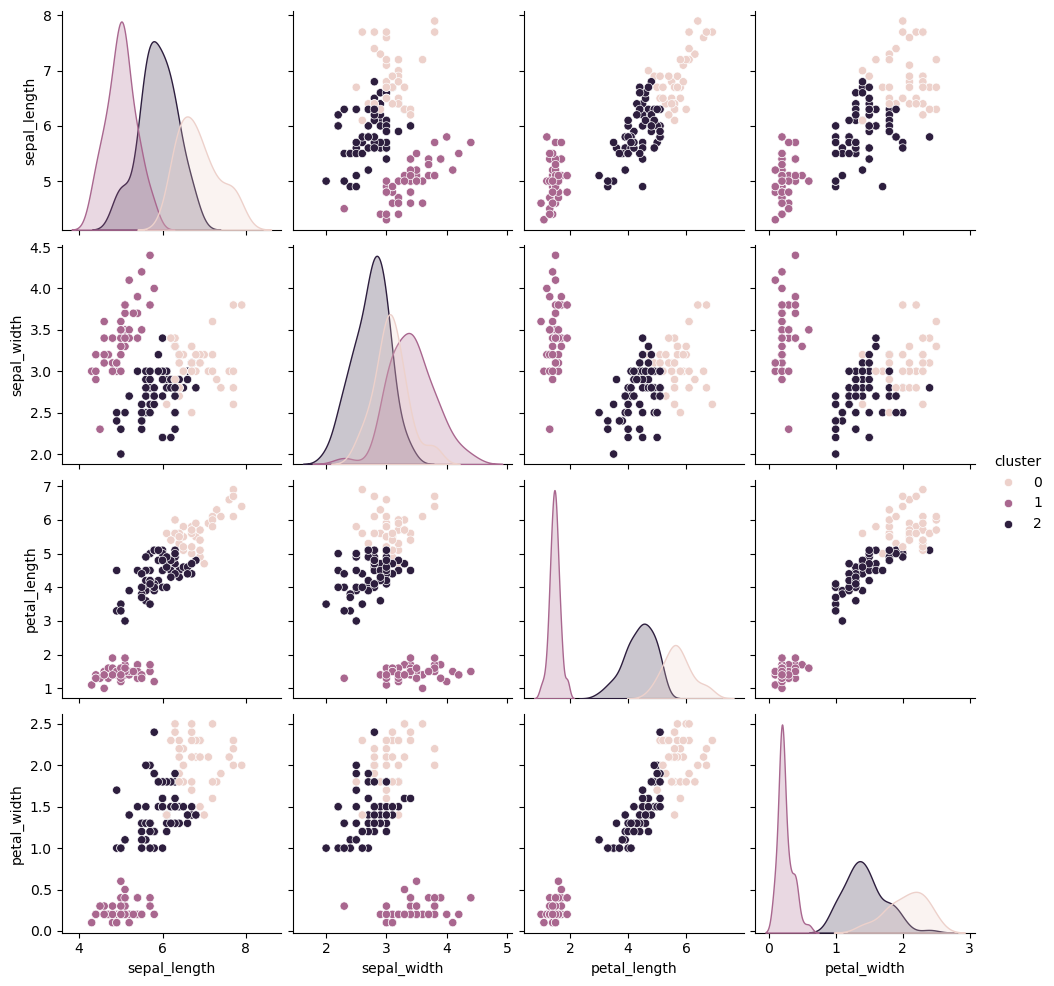

Silhouette Score: 0.5509643746707441


In [26]:
# Load the dataset
df = pd.read_csv('iris.csv')

# Drop the species column (assumed to be the last column in the dataset)
X = df.drop(columns=['species'])  # or use df.iloc[:, :-1] if the column name is different

# Run k-means with 3 clusters (since Iris dataset has 3 species)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Assign cluster labels to the DataFrame
df['cluster'] = kmeans.labels_

# Visualize clusters using pairplot
sns.pairplot(df, hue='cluster')
plt.show()

# Compute and print silhouette score
score = silhouette_score(X, kmeans.labels_)
print(f'Silhouette Score: {score}')


3) (0.5 points) Compute the average silhouette score for each cluster. Explain what this measures.

In [27]:
from sklearn.metrics import silhouette_score
import pandas as pd
from sklearn.cluster import KMeans

# Load the dataset (e.g., iris.csv)
df = pd.read_csv('iris.csv')
X = df.drop(columns=['species'])  # Assuming the 'species' column exists

# Run k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Get the labels (clusters) assigned by k-means
labels = kmeans.labels_

# Compute the silhouette score
silhouette_avg = silhouette_score(X, labels)

# Print the average silhouette score
print(f"Average Silhouette Score: {silhouette_avg}")


Average Silhouette Score: 0.5509643746707441


C:\Users\David\miniconda3\envs\iml_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


4) (1.0 point) Compare the clusters inferred by k-means with the data labels using a confusion matrix.
Did k-means accurately distinguish the three species?

C:\Users\David\miniconda3\envs\iml_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


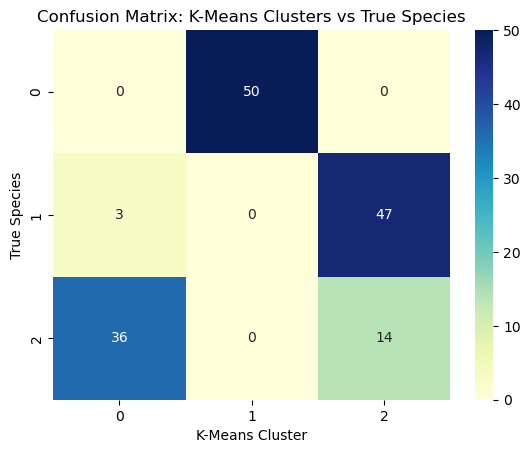

In [28]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (e.g., iris.csv)
df = pd.read_csv('iris.csv')

# Extract the features and true labels (species)
X = df.drop(columns=['species'])  # Assuming 'species' column exists
true_labels = df['species']

# Convert true species labels (strings) to integers
le = LabelEncoder()
true_labels_numeric = le.fit_transform(true_labels)

# Run k-means clustering with 3 clusters (since Iris dataset has 3 species)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Get the cluster labels assigned by k-means
predicted_labels = kmeans.labels_

# Create the confusion matrix
conf_matrix = confusion_matrix(true_labels_numeric, predicted_labels)

# Plot confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap="YlGnBu")
plt.xlabel("K-Means Cluster")
plt.ylabel("True Species")
plt.title("Confusion Matrix: K-Means Clusters vs True Species")
plt.show()

5) (1.0 point) unknown species.csv contains data on 6 flowers of unknown species. Use your trained
k-means model to predict which cluster these new flowers belong to.

In [29]:
import pandas as pd
from sklearn.cluster import KMeans

# Step 1: Load and train the KMeans model on the iris dataset
df = pd.read_csv('iris.csv')
X = df.drop(columns=['species'])  # Drop the species column to keep only the features
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Step 2: Load the unknown species data
unknown_flowers = pd.read_csv('unknown_species.csv')

# Drop unnecessary columns like 'id' and 'species' if they exist
unknown_flowers = unknown_flowers.drop(columns=['id', 'species'], errors='ignore')

# Step 3: Use the trained k-means model to predict the clusters for the new flowers
predicted_clusters = kmeans.predict(unknown_flowers)

# Step 4: Output the predicted clusters for the new flowers
print("Predicted clusters for the unknown flowers:")
print(predicted_clusters)

Predicted clusters for the unknown flowers:
[1 2 1 0 0 2]


C:\Users\David\miniconda3\envs\iml_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


6) (1.0 point) Implement k-means from scratch and test your implementation on the iris dataset.

Converged after 6 iterations.


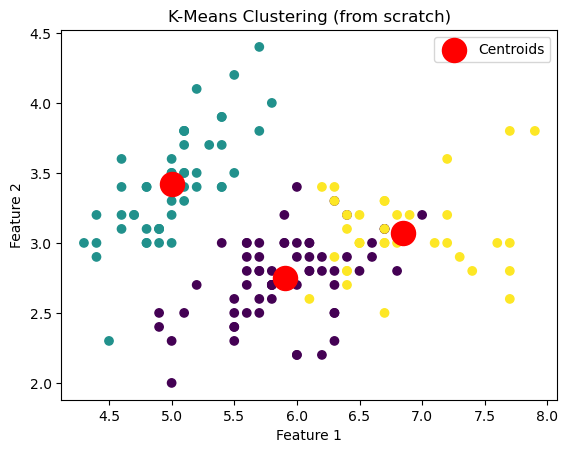

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to compute Euclidean distance between two points
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# K-means algorithm from scratch
class KMeansScratch:
    def __init__(self, k=3, max_iters=100, tolerance=0.0001):
        self.k = k
        self.max_iters = max_iters
        self.tolerance = tolerance

    def fit(self, X):
        # Step 1: Initialize centroids randomly from the data points
        np.random.seed(42)
        random_indices = np.random.choice(X.shape[0], self.k, replace=False)
        self.centroids = X[random_indices]

        for i in range(self.max_iters):
            # Step 2: Assign points to the nearest centroid
            self.clusters = self._assign_clusters(X)

            # Step 3: Save old centroids to check convergence
            old_centroids = self.centroids.copy()

            # Step 4: Recompute the centroids
            self.centroids = self._compute_centroids(X)

            # Step 5: Check for convergence
            diff = np.sum(np.abs(self.centroids - old_centroids))
            if diff < self.tolerance:
                print(f"Converged after {i+1} iterations.")
                break

    def _assign_clusters(self, X):
        clusters = []
        for point in X:
            distances = [euclidean_distance(point, centroid) for centroid in self.centroids]
            cluster = np.argmin(distances)
            clusters.append(cluster)
        return np.array(clusters)

    def _compute_centroids(self, X):
        centroids = np.zeros((self.k, X.shape[1]))
        for cluster in range(self.k):
            points_in_cluster = X[self.clusters == cluster]
            centroids[cluster] = np.mean(points_in_cluster, axis=0)
        return centroids

    def predict(self, X):
        return self._assign_clusters(X)

# Load the iris dataset
df = pd.read_csv('iris.csv')

# Drop the species column to keep only the features
X = df.drop(columns=['species']).values  # Convert to numpy array

# Step 6: Run K-means from scratch
kmeans_scratch = KMeansScratch(k=3)
kmeans_scratch.fit(X)

# Step 7: Predict cluster assignments for the same dataset
predicted_clusters = kmeans_scratch.predict(X)

# Step 8: Visualize the results using a scatter plot
plt.scatter(X[:, 0], X[:, 1], c=predicted_clusters, cmap='viridis')
plt.scatter(kmeans_scratch.centroids[:, 0], kmeans_scratch.centroids[:, 1], s=300, c='red', label='Centroids')
plt.title("K-Means Clustering (from scratch)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

### C.II. DBScan and PCA (3.5 points)

1. (0.5 points) Study DBScan and briefly describe how this algorithm works. (Aim for three sentences.)

DBScan, also known as Density-Based Spatial Clustering of Applicaations with Noise, is a clustering algotihm that groups together points that are closely packed based on a specified distance metric and minimum number of points. It identifies "core points" with a least a minimum number of neighbors within a given radius, "border points" that are reachable from core points but have fewer neighbors, and "noise points" that don't belong to any cluster. Unlike k-means, DBScan does not require specifiying the number of clusters beforehand and can identify clusters of arbitrary shapes, but it may struggle with datasets that have varying densities.

2. (0.5 points) Read the dataset in ulu.csv and apply scikit-learn’s implementation of DBScan to
infer clusters. (Keep parameters at their defaults.) How many clusters did you get?

In [31]:
import pandas as pd
from sklearn.cluster import DBSCAN

# Step 1: Load the dataset
df = pd.read_csv('ulu.csv')

# Step 2: Apply DBScan (keeping default parameters)
dbscan = DBSCAN()
clusters = dbscan.fit_predict(df)

# Step 3: Determine the number of clusters
# DBScan assigns -1 to noise points, so we need to consider unique values excluding -1
num_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)

print(f"Number of clusters inferred by DBScan: {num_clusters}")


Number of clusters inferred by DBScan: 8


3. (0.5 points) Plot some projections of the data into two dimensions. Color using the clusters inferred
by DBScan. What shapes do you recognize?

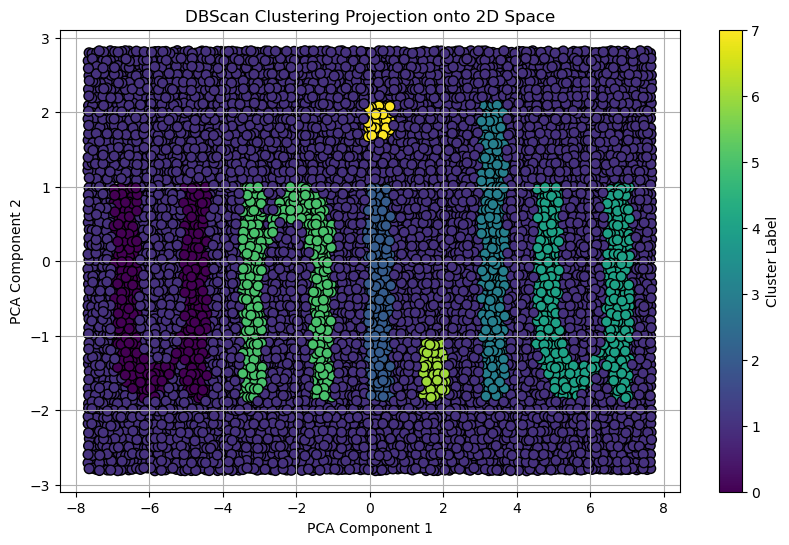

In [32]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 1: Load the dataset
df = pd.read_csv('ulu.csv')

# Step 2: Apply DBScan (keeping default parameters)
dbscan = DBSCAN()
clusters = dbscan.fit_predict(df)

# Step 3: Use PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df)

# Step 4: Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title("DBScan Clustering Projection onto 2D Space")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()


4. (1 point) Use PCA to find a two-dimensional projection of maximum variance and plot the data
under this projection. Informally describe what this transformation does. For 3-dimensional data,
what does it do geometrically?

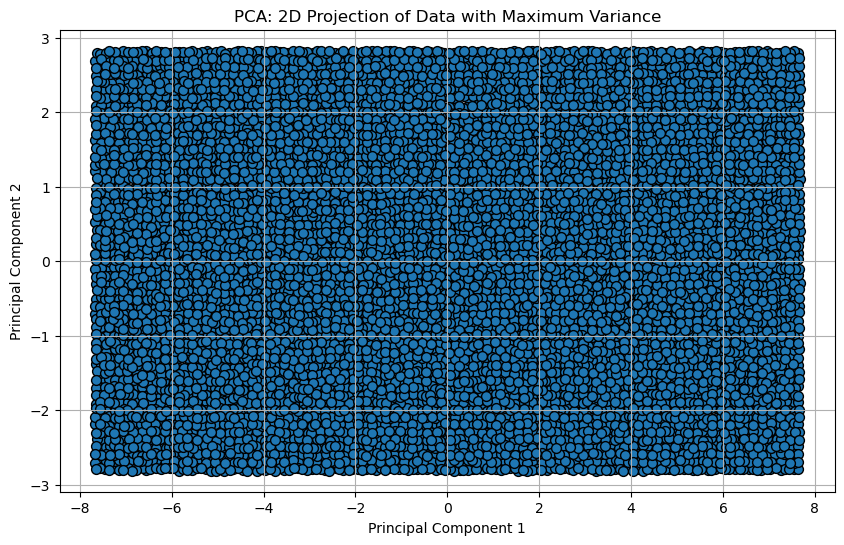

Explained variance by each principal component: [0.8730992  0.11963923]


In [33]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 1: Load the dataset
df = pd.read_csv('ulu.csv')

# Step 2: Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df)

# Step 3: Plot the PCA results
plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], marker='o', edgecolor='k', s=50)
plt.title("PCA: 2D Projection of Data with Maximum Variance")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

# Step 4: Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by each principal component: {explained_variance}")

5. (0.5 points) Now run k-means instead of DBScan. Compare their silhouette scores.


K-Means Silhouette Score: 0.4321530652954487
DBScan Silhouette Score: -1


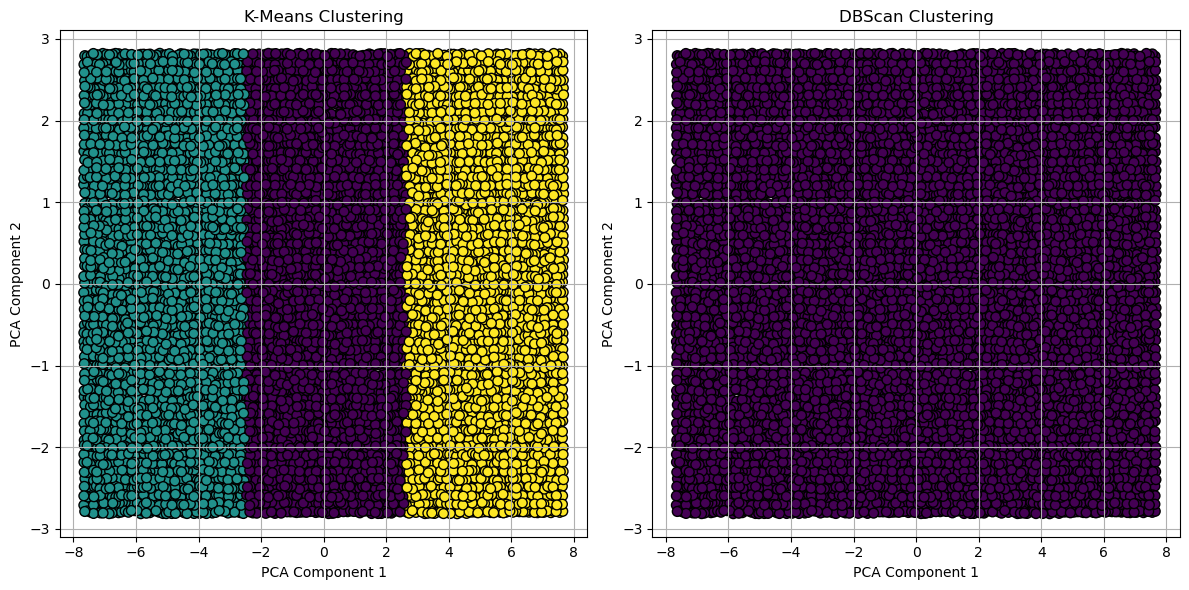

In [34]:
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('ulu.csv')

# Apply PCA to reduce to 2 dimensions for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df)

# 1. Run K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(reduced_data)

# Compute silhouette score for K-Means
kmeans_silhouette_score = silhouette_score(reduced_data, kmeans_labels)
print(f"K-Means Silhouette Score: {kmeans_silhouette_score}")

# 2. Run DBScan
dbscan = DBSCAN()
dbscan_labels = dbscan.fit_predict(reduced_data)

# Compute silhouette score for DBScan
# Note: Silhouette score is only defined for clusters, ignore noise points (-1)
if len(set(dbscan_labels)) > 1 and -1 in dbscan_labels:
    dbscan_silhouette_score = silhouette_score(reduced_data[dbscan_labels != -1], dbscan_labels[dbscan_labels != -1])
else:
    dbscan_silhouette_score = -1  # Assign -1 if not enough clusters

print(f"DBScan Silhouette Score: {dbscan_silhouette_score}")

# 3. Visualization of K-Means
plt.figure(figsize=(12, 6))

# K-Means Plot
plt.subplot(1, 2, 1)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans_labels, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title("K-Means Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)

# DBScan Plot
plt.subplot(1, 2, 2)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=dbscan_labels, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title("DBScan Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)

plt.tight_layout()
plt.show()


6. (0.5 points) Would silhouette scores be a good cost function to learn the interpretable clusters in
this data?

Silhouette scores can be useful for evaluating clustering quality, but they may not be the best cost function for learning interpretable clusters. While they indicate how well-separeted and compact clusters are, they are sensitive to noise and may favor larger clusters, potentially overlooking smaller, meaningful groupings. It's often better to use silhouette scores alongside other metrics and visualizations for more comprehensive assessement.